In [2]:
# prerequisite package imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
# Initial parameters
m = -1  # Initial slope
b = 1   # Initial intercept
learning_rate = 0.1
n_iterations = 4


In [4]:
# Given data points
X = np.array([1, 3])
y = np.array([3, 6])
n = len(X)


In [5]:
# Lists to store values for plotting
m_values = [m]
b_values = [b]
errors = []


In [6]:
# Function to calculate predictions
def predict(X, m, b):
    """Calculate y = mx + b"""
    return m * X + b


In [7]:
# Function to calculate Mean Squared Error
def calculate_mse(y_true, y_pred):
    """Calculate Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)


In [8]:
# Gradient Descent Implementation
print("Starting Gradient Descent")
print(f"Initial values: m = {m}, b = {b}")
print(f"Learning rate: {learning_rate}")
print(f"Data points: {list(zip(X, y))}")
print("\n" + "="*60 + "\n")


Starting Gradient Descent
Initial values: m = -1, b = 1
Learning rate: 0.1
Data points: [(np.int64(1), np.int64(3)), (np.int64(3), np.int64(6))]




In [9]:
for iteration in range(n_iterations):
    print(f"ITERATION {iteration + 1}:")
    print(f"Current parameters: m = {m:.4f}, b = {b:.4f}")

    # Step 1: Make predictions with current m and b
    y_pred = predict(X, m, b)
    print(f"Predictions: ŷ₁ = {m:.4f}×{X[0]} + {b:.4f} = {y_pred[0]:.4f}")
    print(f"             ŷ₂ = {m:.4f}×{X[1]} + {b:.4f} = {y_pred[1]:.4f}")
    print(f"Predictions array: ŷ = {y_pred}")

    # Step 2: Calculate errors for each point
    errors_i = y - y_pred
    print(f"Errors (y - ŷ): {errors_i}")
    print(f"Error details: y₁-ŷ₁ = {y[0]}-{y_pred[0]:.4f} = {errors_i[0]:.4f}")
    print(f"               y₂-ŷ₂ = {y[1]}-{y_pred[1]:.4f} = {errors_i[1]:.4f}")

    # Step 3: Calculate current MSE
    mse = calculate_mse(y, y_pred)
    errors.append(mse)
    print(f"Mean Squared Error: {mse:.4f}")

    # Step 4: Calculate gradients
    # ∂J/∂m = -2/n * Σ(yi - ŷi)xi
    dJ_dm = -2/n * np.sum(errors_i * X)
    print(f"∂J/∂m = -2/{n} * Σ(yi - ŷi)xi")
    print(f"       = -2/{n} * ({errors_i[0]:.4f}×{X[0]} + {errors_i[1]:.4f}×{X[1]})")
    print(f"       = -2/{n} * ({errors_i[0]*X[0]:.4f} + {errors_i[1]*X[1]:.4f})")
    print(f"       = -2/{n} * {np.sum(errors_i * X):.4f} = {dJ_dm:.4f}")

    # ∂J/∂b = -2/n * Σ(yi - ŷi)
    dJ_db = -2/n * np.sum(errors_i)
    print(f"∂J/∂b = -2/{n} * Σ(yi - ŷi)")
    print(f"       = -2/{n} * ({errors_i[0]:.4f} + {errors_i[1]:.4f})")
    print(f"       = -2/{n} * {np.sum(errors_i):.4f} = {dJ_db:.4f}")

    # Step 5: Update parameters
    m_old = m
    b_old = b
    m = m - learning_rate * dJ_dm
    b = b - learning_rate * dJ_db

    print(f"Parameter updates:")
    print(f"m_new = {m_old:.4f} - {learning_rate} × {dJ_dm:.4f} = {m:.4f}")
    print(f"b_new = {b_old:.4f} - {learning_rate} × {dJ_db:.4f} = {b:.4f}")

    # Store values for plotting
    m_values.append(m)
    b_values.append(b)

    print("\n" + "-"*60 + "\n")


ITERATION 1:
Current parameters: m = -1.0000, b = 1.0000
Predictions: ŷ₁ = -1.0000×1 + 1.0000 = 0.0000
             ŷ₂ = -1.0000×3 + 1.0000 = -2.0000
Predictions array: ŷ = [ 0 -2]
Errors (y - ŷ): [3 8]
Error details: y₁-ŷ₁ = 3-0.0000 = 3.0000
               y₂-ŷ₂ = 6--2.0000 = 8.0000
Mean Squared Error: 36.5000
∂J/∂m = -2/2 * Σ(yi - ŷi)xi
       = -2/2 * (3.0000×1 + 8.0000×3)
       = -2/2 * (3.0000 + 24.0000)
       = -2/2 * 27.0000 = -27.0000
∂J/∂b = -2/2 * Σ(yi - ŷi)
       = -2/2 * (3.0000 + 8.0000)
       = -2/2 * 11.0000 = -11.0000
Parameter updates:
m_new = -1.0000 - 0.1 × -27.0000 = 1.7000
b_new = 1.0000 - 0.1 × -11.0000 = 2.1000

------------------------------------------------------------

ITERATION 2:
Current parameters: m = 1.7000, b = 2.1000
Predictions: ŷ₁ = 1.7000×1 + 2.1000 = 3.8000
             ŷ₂ = 1.7000×3 + 2.1000 = 7.2000
Predictions array: ŷ = [3.8 7.2]
Errors (y - ŷ): [-0.8 -1.2]
Error details: y₁-ŷ₁ = 3-3.8000 = -0.8000
               y₂-ŷ₂ = 6-7.2000 = -1.2000

In [10]:
# Final predictions
print("FINAL RESULTS:")
print(f"Final m = {m:.4f}")
print(f"Final b = {b:.4f}")
y_final = predict(X, m, b)
print(f"Final predictions: {y_final}")
print(f"Final MSE: {calculate_mse(y, y_final):.6f}")


FINAL RESULTS:
Final m = 1.3336
Final b = 1.8968
Final predictions: [3.2304 5.8976]
Final MSE: 0.031785


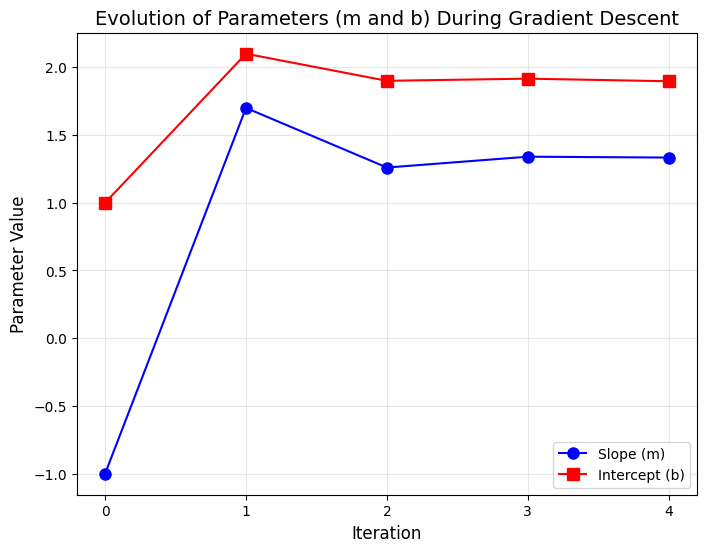

In [11]:
# Create visualization 1: Parameters (m and b) over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(m_values)), m_values, 'b-o', label='Slope (m)', markersize=8)
plt.plot(range(len(b_values)), b_values, 'r-s', label='Intercept (b)', markersize=8)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Parameter Value', fontsize=12)
plt.title('Evolution of Parameters (m and b) During Gradient Descent', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(len(m_values)))
plt.show()


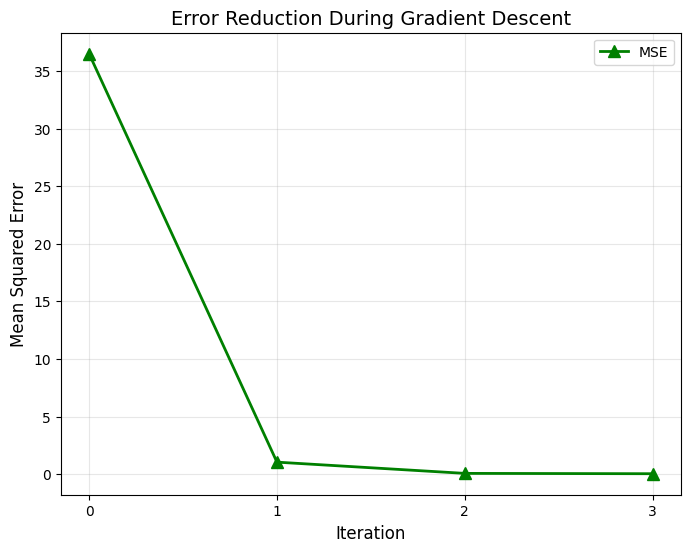

In [12]:
# Create visualization 2: Error over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(errors)), errors, 'g-^', label='MSE', markersize=8, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Error Reduction During Gradient Descent', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(len(errors)))
plt.show()

In [13]:
# Compare with SciPy's linear regression
slope_scipy, intercept_scipy, r_value, p_value, std_err = stats.linregress(X, y)
print(f"\nComparison with SciPy's linregress:")
print(f"Our gradient descent (after {n_iterations} iterations): m = {m:.4f}, b = {b:.4f}")
print(f"SciPy linregress (optimal): m = {slope_scipy:.4f}, b = {intercept_scipy:.4f}")
print(f"Difference in m: {abs(m - slope_scipy):.6f}")
print(f"Difference in b: {abs(b - intercept_scipy):.6f}")



Comparison with SciPy's linregress:
Our gradient descent (after 4 iterations): m = 1.3336, b = 1.8968
SciPy linregress (optimal): m = 1.5000, b = 1.5000
Difference in m: 0.166400
Difference in b: 0.396800
